<h4 align='right'>JYOTI (DIA-66)</h4>
<h1 align='center' style="color:green">SMS SPAM DETECTION MODEL</h1>

## Data Understanding

In [1]:
# importing libraries  

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk 
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from collections import Counter
import string
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.metrics import classification_report,recall_score,f1_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
#LOADING DATASET

In [4]:
spam_df=pd.read_csv('spam_dataset.csv')

In [5]:
#Information about dataset
print('Rows present in sms spam collection dataset: ',spam_df.shape[0])
print('Columns present in sms spam collection dataset: ',spam_df.shape[1])

Rows present in sms spam collection dataset:  5572
Columns present in sms spam collection dataset:  5


In [6]:
print('Columns present in sms spam collection dataset are:- \n',spam_df.columns)

Columns present in sms spam collection dataset are:- 
 Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [7]:
spam_df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni…,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
spam_df.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [9]:
spam_df.sample(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2472,spam,Final Chance! Claim ur å£150 worth of discount...,NaN,NaN,NaN
1720,ham,"Fighting with the world is easy, u either win ...",NaN,NaN,NaN
854,ham,Stop the story. I've told him i've returned it...,NaN,NaN,NaN
2983,ham,He said that he had a right giggle when he saw...,NaN,NaN,NaN
374,spam,"Thanks for your Ringtone Order, Reference T91....",NaN,NaN,NaN
4622,ham,U need my presnts always bcz U cant mis love. ...,NaN,NaN,NaN
3462,ham,i am seeking a lady in the street and a freak ...,NaN,NaN,NaN
829,ham,Thanks for yesterday sir. You have been wonder...,NaN,NaN,NaN
3176,ham,In meeting da. I will call you,NaN,NaN,NaN
3933,ham,How come guoyang go n tell her? Then u told her?,NaN,NaN,NaN


In [10]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data cleaning

In [11]:
#finding missing values

In [12]:
spam_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
#finding missing values

In [14]:
print('Duplicate rows present in dataset are: ',spam_df.duplicated().sum())

Duplicate rows present in dataset are:  403


In [15]:
#-->fixing duplicate values

In [16]:
print('duplicate rows present in dataset are: ',spam_df.duplicated().sum())

duplicate rows present in dataset are:  403


In [17]:
spam_df=spam_df.drop_duplicates(keep='first')

In [18]:
spam_df.duplicated().sum()

0

In [19]:
print('After droping duplicate rows present in dataset the shape of dataset became: ',spam_df.shape)

After droping duplicate rows present in dataset the shape of dataset became:  (5169, 5)


In [20]:
#Fixing unwanted features

In [21]:
#Taking only v1 and v2 as dataset columns
spam_df=spam_df[['v1','v2']]

In [22]:
print('columns in dataset:',spam_df.columns)
###renaming the columns as Target and Text
spam_df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
print('After renaming columns name the columns in dataset are:',spam_df.columns)

columns in dataset: Index(['v1', 'v2'], dtype='object')
After renaming columns name the columns in dataset are: Index(['Target', 'Text'], dtype='object')


In [23]:
# modifying target column using label encoding

In [24]:
Lab_enc=LabelEncoder()
spam_df['Target']=Lab_enc.fit_transform(spam_df['Target'])
spam_df.head(10)

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni…
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


### Data Visualization with EDA

In [25]:
#0-->Ham   and 1-->Spam
spam_df["Target"].value_counts()

0    4516
1     653
Name: Target, dtype: int64

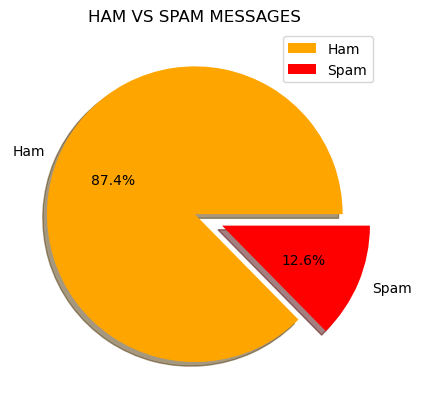

In [26]:
lab=['Ham','Spam']
color=['orange','red']
plt.pie(spam_df['Target'].value_counts(), labels=lab,autopct="%1.1f%%",shadow=True,explode = (0, 0.2),colors=color)
plt.title("HAM VS SPAM MESSAGES")
plt.legend(lab)
plt.show()

In [27]:
#creating new columns as 'number of charecters as num_char','number of words as num_words',
#'number of sentances as num_sent' present in a text.

In [28]:
spam_df["num_char"]=spam_df["Text"].apply(len)

In [29]:
spam_df['num_words']=spam_df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
spam_df['num_sent']=spam_df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
spam_df.head(10)

,Target,Text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni…,27,7,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,31,2
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3


In [32]:
#analyzing dataset

In [33]:
spam_df.iloc[:,2:].describe()

,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977559,18.455601,1.965564
std,58.236632,13.324917,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


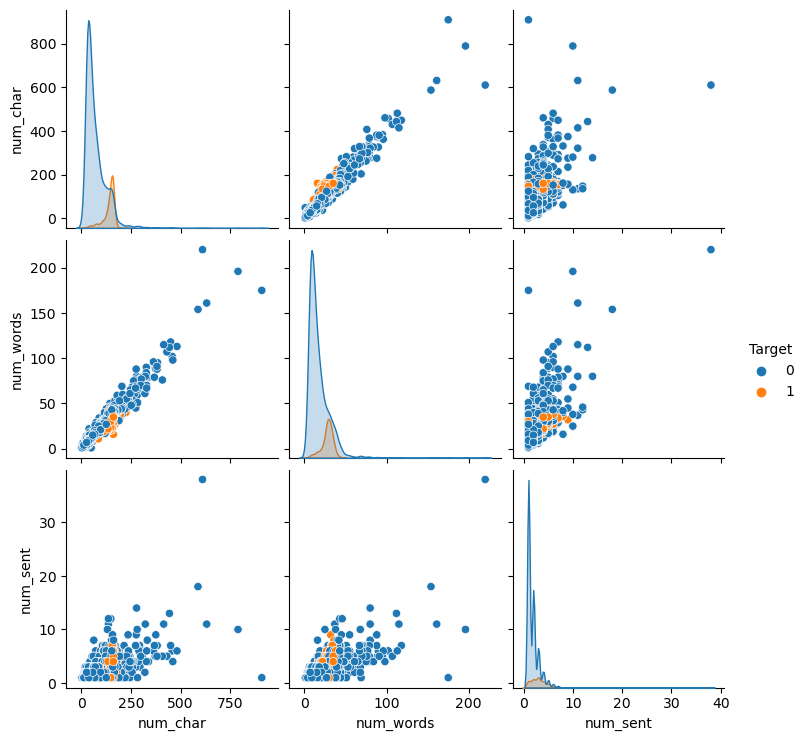

In [34]:
sns.pairplot(spam_df,hue='Target')
plt.show()

In [35]:
#analysing new features for SPAM messages 
spam_df[spam_df['Target']==1].iloc[:,2:].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
#analysing new features for HAM messages 
spam_df[spam_df['Target']==0].iloc[:,2:].describe()

,num_char,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.458813,17.123561,1.820195
std,56.358541,13.494128,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


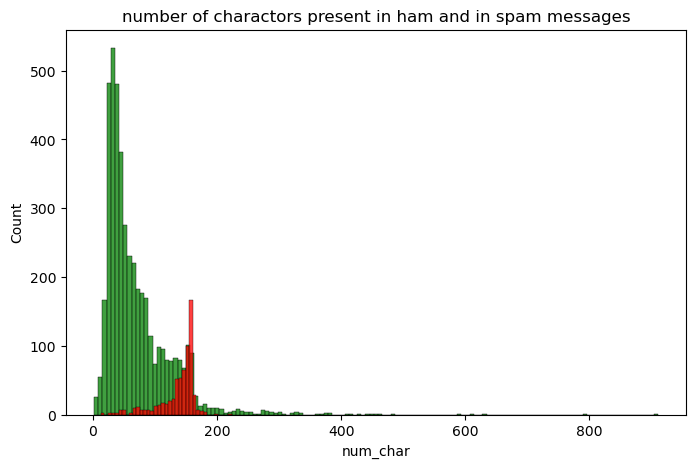

In [37]:
#analysing num_char present in ham and in spam messages
plt.figure(figsize=(8,5))
plt.title("number of charactors present in ham and in spam messages")
sns.histplot(spam_df[spam_df['Target'] == 0]['num_char'],color='green')
sns.histplot(spam_df[spam_df['Target'] == 1]['num_char'],color='red')
plt.show()

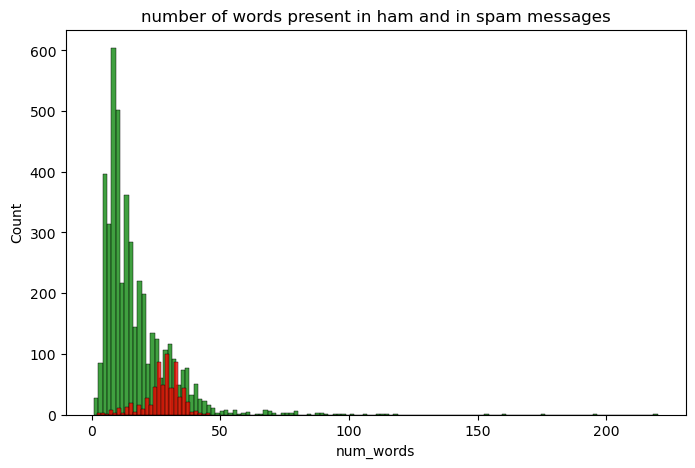

In [38]:
#analysing num_words present in ham and in spam messages

plt.figure(figsize=(8,5))
plt.title("number of words present in ham and in spam messages")
sns.histplot(spam_df[spam_df['Target'] == 0]['num_words'],color='green')
sns.histplot(spam_df[spam_df['Target'] == 1]['num_words'],color='red')
plt.show()

In [39]:
spam_df.corr()

,Target,num_char,num_words,num_sent
Target,1.000000,0.384717,0.262915,0.263939
num_char,0.384717,1.000000,0.965761,0.624136
num_words,0.262915,0.965761,1.000000,0.679963
num_sent,0.263939,0.624136,0.679963,1.000000


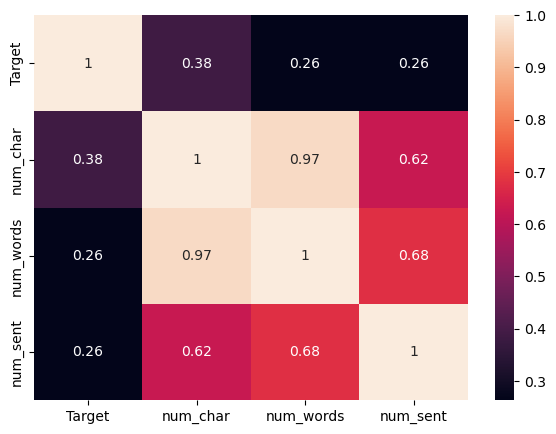

In [40]:
plt.figure(figsize=(7,5))
sns.heatmap(spam_df.corr(),annot=True)
plt.show()

### TEXT PRE-PROCESSING AND FEATURE ENGINEERING

In [41]:
ps = PorterStemmer()
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
spam_df['Transformed_Text'] = spam_df['Text'].apply(transform_text)

In [44]:
spam_df.head(4)

,Target,Text,num_char,num_words,num_sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni…,27,7,2,ok lar joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [45]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(spam_df[spam_df['Target'] == 1]['Transformed_Text'].str.cat(sep=" "))

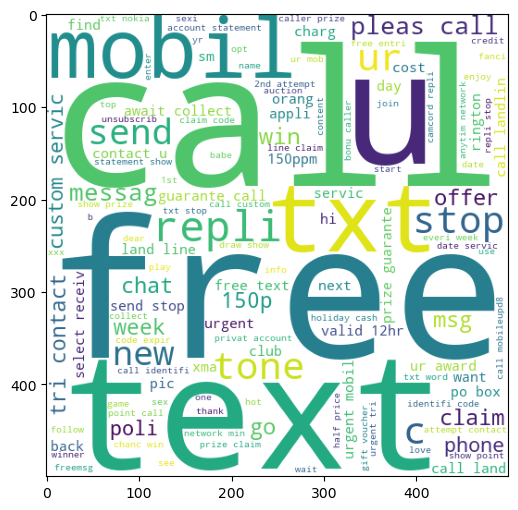

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [47]:
ham_wc = wc.generate(spam_df[spam_df['Target'] == 0]['Transformed_Text'].str.cat(sep=" "))

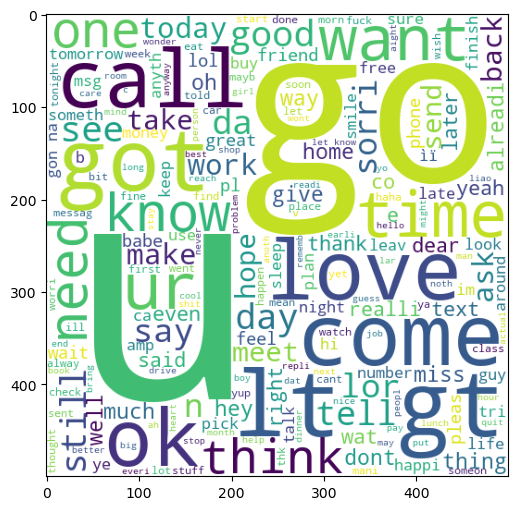

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [49]:
spam_df.head()

,Target,Text,num_char,num_words,num_sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni…,27,7,2,ok lar joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [50]:
spam_corpus = []
for msg in spam_df[spam_df['Target'] == 1]['Transformed_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

9939

In [52]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [53]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

0     320
1     191
2     155
3     141
4     122
5     119
6     119
7     114
8     104
9     103
10     98
11     97
12     82
13     74
14     64
15     64
16     63
17     60
18     57
19     57
20     56
21     55
22     52
23     51
24     51
25     49
26     48
27     45
28     45
29     45
Name: 1, dtype: int64

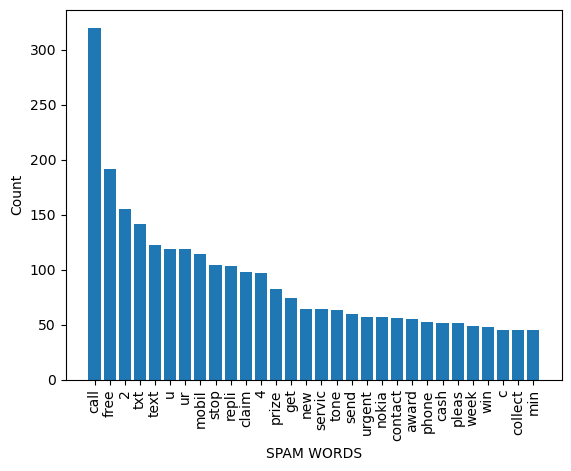

In [54]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('SPAM WORDS')
plt.ylabel('Count')
plt.show()

In [55]:
ham_corpus = []
for msg in spam_df[spam_df['Target'] == 0]['Transformed_Text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35403

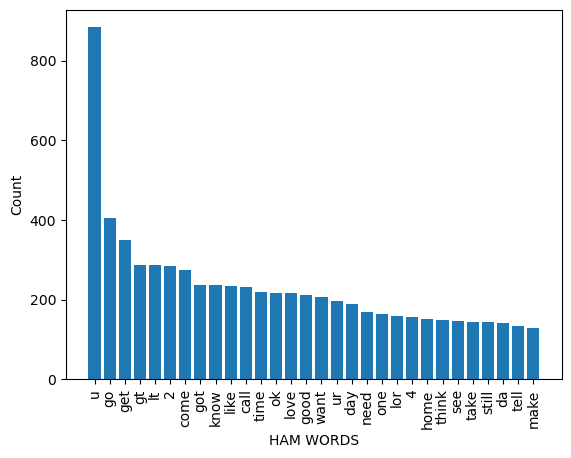

In [57]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('HAM WORDS')
plt.ylabel('Count')
plt.show()

In [58]:
# Text Vectorization

In [59]:
spam_df.head()

,Target,Text,num_char,num_words,num_sent,Transformed_Text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni…,27,7,2,ok lar joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = tfidf.fit_transform(spam_df['Transformed_Text']).toarray()

In [62]:
y = spam_df['Target'].values

In [63]:
X.shape

(5169, 3000)

In [64]:
y.shape

(5169,)

In [65]:
#Split data

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

## RESEARCHING THE MODEL THAT WILL BE BEST FOR SMS SPAM DETECTION MODEL
### Naive Base Algorithm

In [67]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

nb=[gnb,mnb,bnb]
for i in nb:
    i.fit(X_train,y_train)

In [68]:
for i in nb:
    y_train_pred = i.predict(X_train)
    y_test_pred = i.predict(X_test)
    print("-->When Using ",i," Algorithm, Model shows:-")
    print('Accuracy score on Training Dataset is: ',accuracy_score(y_train,y_train_pred))
    print('Accuracy score on Testing dataset is: ',accuracy_score(y_test,y_test_pred))
    print('Precision score : {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
    print('\nConfusion metrix:\n',confusion_matrix(y_test,y_test_pred))
    print('\nClassification report: \n',classification_report(y_test,y_test_pred))
    print('\n')

-->When Using  GaussianNB()  Algorithm, Model shows:-
Accuracy score on Training Dataset is:  0.8931076178960097
Accuracy score on Testing dataset is:  0.8694390715667312
Precision score : 0.5068

Confusion metrix:
 [[788 108]
 [ 27 111]]

Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       896
           1       0.51      0.80      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.84      0.77      1034
weighted avg       0.91      0.87      0.88      1034



-->When Using  MultinomialNB()  Algorithm, Model shows:-
Accuracy score on Training Dataset is:  0.9789600967351875
Accuracy score on Testing dataset is:  0.9709864603481625
Precision score : 1.0000

Confusion metrix:
 [[896   0]
 [ 30 108]]

Classification report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      

### Logistic Regression Algorithm

In [69]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [70]:
y_train_pred = lrc.predict(X_train)
y_test_pred = lrc.predict(X_test)
print("-->When Using ",lrc," Algorithm, Model shows:-")
print('Accuracy score on Training Dataset is: ',accuracy_score(y_train,y_train_pred))
print('Accuracy score on Testing dataset is: ',accuracy_score(y_test,y_test_pred))
print('Precision score : {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
print('\nConfusion metrix:\n',confusion_matrix(y_test,y_test_pred))
print('\nClassification report: \n',classification_report(y_test,y_test_pred))
print('\n')

-->When Using  LogisticRegression(penalty='l1', solver='liblinear')  Algorithm, Model shows:-
Accuracy score on Training Dataset is:  0.9637243047158404
Accuracy score on Testing dataset is:  0.9584139264990329
Precision score : 0.9703

Confusion metrix:
 [[893   3]
 [ 40  98]]

Classification report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       0.97      0.71      0.82       138

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034





### SVM Algorithm

In [71]:
k=['linear','rbf','sigmoid']
c=[1.0,100.0,1000.0]

for i in k:
    for j in c:
        svc=SVC(C=j,kernel=i) 
        svc.fit(X_train,y_train)

In [72]:
for i in k:
    for j in c:
        svc=SVC(C=j,kernel=i) 
        svc.fit(X_train,y_train)
        y_train_pred = svc.predict(X_train)
        y_test_pred = svc.predict(X_test)
        print('-->When Using SVM Algorithm with ',i,' kernel and ','C=',j,', Model shows:-')
        print('Accuracy score on Training Dataset: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
        print('Accuracy score on Testing Dataset: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))
        print('Precision score: {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
        print('Confusion matrix is: \n',confusion_matrix(y_test,y_test_pred))
        print('\nClassification report: \n',classification_report(y_test,y_test_pred))
        print('\n')

-->When Using SVM Algorithm with  linear  kernel and  C= 1.0 , Model shows:-
Accuracy score on Training Dataset: 0.9911
Accuracy score on Testing Dataset: 0.9787
Precision score: 0.9754
Confusion matrix is: 
 [[893   3]
 [ 19 119]]

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.86      0.92       138

    accuracy                           0.98      1034
   macro avg       0.98      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



-->When Using SVM Algorithm with  linear  kernel and  C= 100.0 , Model shows:-
Accuracy score on Training Dataset: 0.9998
Accuracy score on Testing Dataset: 0.9710
Precision score: 0.9286
Confusion matrix is: 
 [[887   9]
 [ 21 117]]

Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       896
           1       0.93      0.85      0.89 

### KNN Algorithm

In [73]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [74]:
y_train_pred = knc.predict(X_train)
y_test_pred = knc.predict(X_test)
print("-->When Using KNN Algorithm, Model shows:-")
print('Accuracy score on Training Dataset: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
print('Accuracy score on Testing Dataset: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))
print('Precision score : {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
print('Confusion matrix is: \n',confusion_matrix(y_test,y_test_pred))
print('\nClassification report: \n',classification_report(y_test,y_test_pred))
print('\n')

-->When Using KNN Algorithm, Model shows:-
Accuracy score on Training Dataset: 0.9258
Accuracy score on Testing Dataset: 0.9052
Precision score : 1.0000
Confusion matrix is: 
 [[896   0]
 [ 98  40]]

Classification report: 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       896
           1       1.00      0.29      0.45       138

    accuracy                           0.91      1034
   macro avg       0.95      0.64      0.70      1034
weighted avg       0.91      0.91      0.88      1034





### DecisionTree Algorithm

In [75]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [76]:
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)
print("-->When Using Decision Tree Algorithm, Model shows:-")
print('Accuracy score on Training Dataset: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
print('Accuracy score on Testing Dataset: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))
print('Precision score : {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
print('Confusion matrix is: \n',confusion_matrix(y_test,y_test_pred))
print('\nClassification report: \n',classification_report(y_test,y_test_pred))
print('\n')

-->When Using Decision Tree Algorithm, Model shows:-
Accuracy score on Training Dataset: 0.9497
Accuracy score on Testing Dataset: 0.9294
Precision score : 0.8283
Confusion matrix is: 
 [[879  17]
 [ 56  82]]

Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       896
           1       0.83      0.59      0.69       138

    accuracy                           0.93      1034
   macro avg       0.88      0.79      0.83      1034
weighted avg       0.93      0.93      0.92      1034





### Random Forest  Algorithm

In [77]:
RF = RandomForestClassifier(n_estimators=50, criterion='gini',random_state=2)
RF.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [78]:
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print("-->When Using Random Forest Algorithm, Model shows:-")
print('Accuracy score on Training Dataset: {0:0.4f}'. format(accuracy_score(y_train, y_train_pred)))
print('Accuracy score on Testing Dataset: {0:0.4f}'. format(accuracy_score(y_test, y_test_pred)))
print('Precision score : {0:0.4f}'. format(precision_score(y_test, y_test_pred)))
print('Confusion matrix is: \n',confusion_matrix(y_test,y_test_pred))
print('\nClassification report: \n',classification_report(y_test,y_test_pred))
print('\n')

-->When Using Random Forest Algorithm, Model shows:-
Accuracy score on Training Dataset: 0.9998
Accuracy score on Testing Dataset: 0.9768
Precision score : 0.9831
Confusion matrix is: 
 [[894   2]
 [ 22 116]]

Classification report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       896
           1       0.98      0.84      0.91       138

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034





### COMPARISION OF ALGORITHMS 

In [79]:
svc = SVC(kernel='rbf', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [80]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc,
    'RF': rfc
}

In [81]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    
    return accuracy,precision,recall,f1

In [82]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall,current_f1 = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    print("f1 - ",current_f1)
    print('\n')
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    f1_scores.append(current_f1)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
Recall -  0.8115942028985508
f1 -  0.888888888888889


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
Recall -  0.2898550724637681
f1 -  0.44943820224719105


For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
Recall -  0.782608695652174
f1 -  0.878048780487805


For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
Recall -  0.6159420289855072
f1 -  0.7024793388429753


For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
Recall -  0.7101449275362319
f1 -  0.8200836820083682


For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
Recall -  0.8405797101449275
f1 -  0.9062499999999999




In [83]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),
                               'Accuracy':accuracy_scores,
                               'Precision':precision_scores,
                               'recall':recall_scores,
                               'f1':f1_scores}).sort_values('Precision',ascending=False)

In [84]:
performance_df

,Algorithm,Accuracy,Precision,recall,f1
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.976789,0.983051,0.840580,0.906250
0,SVC,0.972921,0.982456,0.811594,0.888889
4,LR,0.958414,0.970297,0.710145,0.820084
3,DT,0.930368,0.817308,0.615942,0.702479


In [128]:
eval_algo=pd.DataFrame(performance_df.iloc[0,1:])

In [130]:
eval_algo

,1
Accuracy,0.905222
Precision,1.0
recall,0.289855
f1,0.449438


In [124]:
eval_algo.iloc[:,0].index

Index(['Accuracy', 'Precision', 'recall', 'f1'], dtype='object')

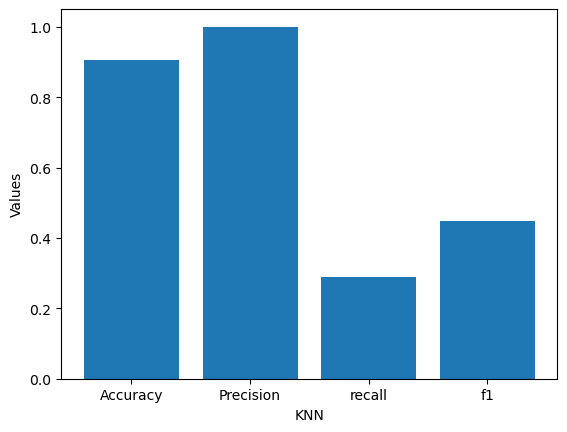

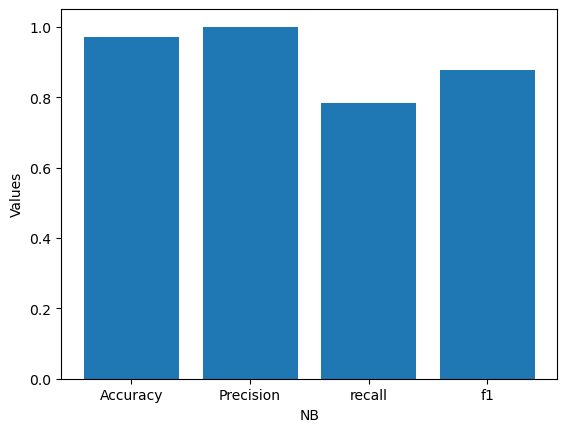

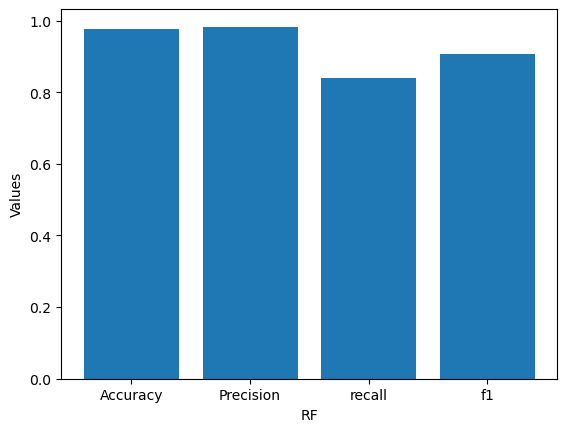

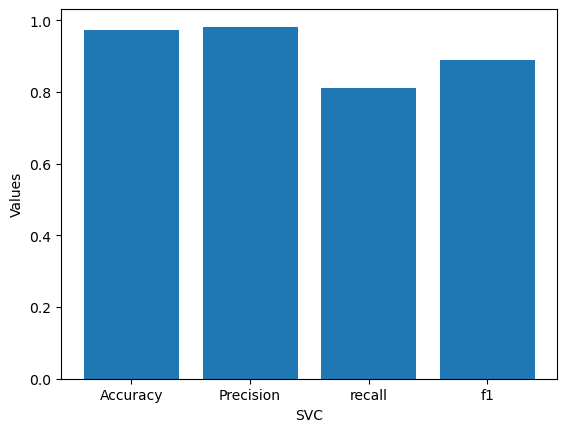

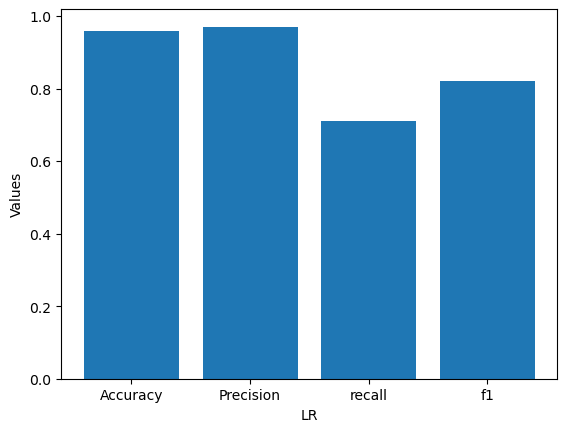

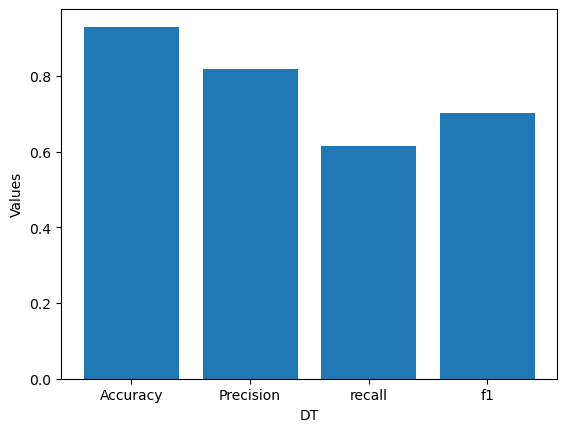

In [88]:
key=['KNN','NB','RF','SVC','LR','DT']
for i in range(len(key)):
    eval_algo=pd.DataFrame(performance_df.iloc[i,1:])
    eval_algo.iloc[:,0].index
    plt.bar(eval_algo.iloc[:,0].index,eval_algo.iloc[:,0],)
    plt.xlabel(key[i])
    plt.ylabel("Values")
    plt.show()
    


In [89]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [90]:
performance_df

,Algorithm,Accuracy,Precision,recall,f1
1,KN,0.905222,1.000000,0.289855,0.449438
2,NB,0.970986,1.000000,0.782609,0.878049
5,RF,0.976789,0.983051,0.840580,0.906250
0,SVC,0.972921,0.982456,0.811594,0.888889
4,LR,0.958414,0.970297,0.710145,0.820084
3,DT,0.930368,0.817308,0.615942,0.702479


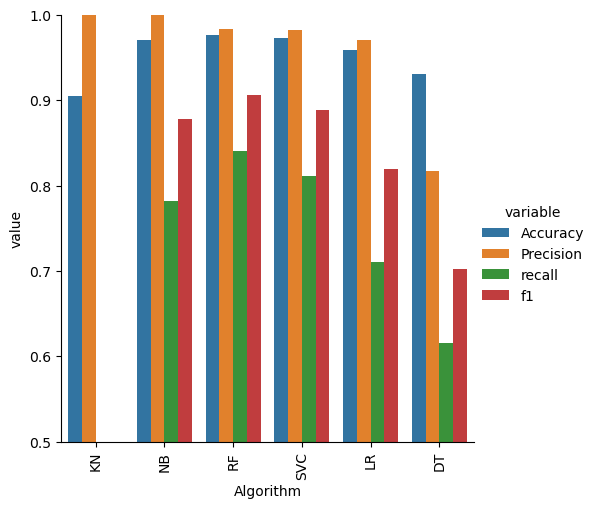

In [91]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

## Model Predictions

In [92]:
#predictions

input_sms=input("Enter the message: ")

transformed_sms=transform_text(input_sms)
mnb_input=tfidf.transform([transformed_sms])

result=mnb.predict(mnb_input)[0]

if result==1:
    print("***SPAM SMS***")
else:
    print("***HAM SMS***")

Enter the message:  Thanks for your payment! Your transaction was successful. If you have any questions, feel free to contact us.
***HAM SMS***


In [93]:
#predictions

input_sms=input("Enter the message: ")

transformed_sms=transform_text(input_sms)
mnb_input=tfidf.transform([transformed_sms])

result=mnb.predict(mnb_input)[0]

if result==1:
    print("***SPAM SMS***")
else:
    print("***HAM SMS***")

Enter the message: You've been selected for a cash prize! Text back 'WIN' to claim your money instantly.
***SPAM SMS***


In [94]:
#Some sms to try

<b>SPAM</b><br>
congratulations you won 1000 call on this number to get your prize<br>
Congratulations! You've won a free cruise vacation! Reply 'YES' to claim your prize now!<br>
You've been selected for a cash prize! Text back 'WIN' to claim your money instantly.<br>
Your mobile number has been chosen for a free iPhone. Click here to claim: www.freephonesgiveaway.com

<br>
<b>HAM</b><br>
did you see the match? It was insane<br>
Hey! Just wanted to check in and see how you're doing. Let's catch up soon!<br>
Meeting confirmed for tomorrow at 2 PM. Looking forward to it!<br>
Reminder: Your dentist appointment is scheduled for Friday at 10 AM. Please confirm.<br>
Thanks for your payment! Your transaction was successful. If you have any questions, feel free to contact us.<br>
Hi, it's Mom. Don't forget to pick up some groceries on your way home. Love you!<br>

<h1 align='center' style="color:red">END OF PROJECT</h1>